This chapter will show you everything you need to know about spaCy's processing pipeline. You'll learn what goes on under the hood when you process a text, how to write your own components and add them to the pipeline, and how to use custom attributes to add your own metadata to the documents, spans and tokens.

# 1. Processing pipelines

Welcome back! This chapter is dedicated to processing pipelines: a series of functions applied to a doc to add attributes like part-of-speech tags, dependency labels or named entities.

In this lesson, you'll learn about the pipeline components provided by spaCy, and what happens behind the scenes when you call nlp on a string of text.

## What happens when you call nlp?

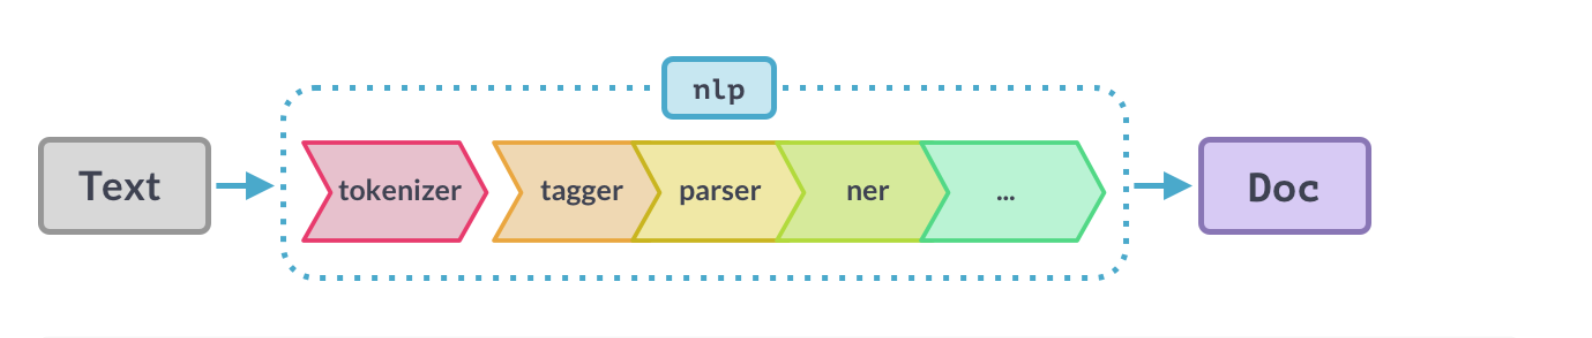

In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
doc = nlp("This is a sentence.")

You've already written this plenty of times by now: pass a string of text to the nlp object, and receive a Doc object.

But what does the nlp object actually do?

First, the tokenizer is applied to turn the string of text into a Doc object. Next, a series of pipeline components is applied to the doc in order. In this case, the tagger, then the parser, then the entity recognizer. Finally, the processed doc is returned, so you can work with it.

## Built-in pipeline components

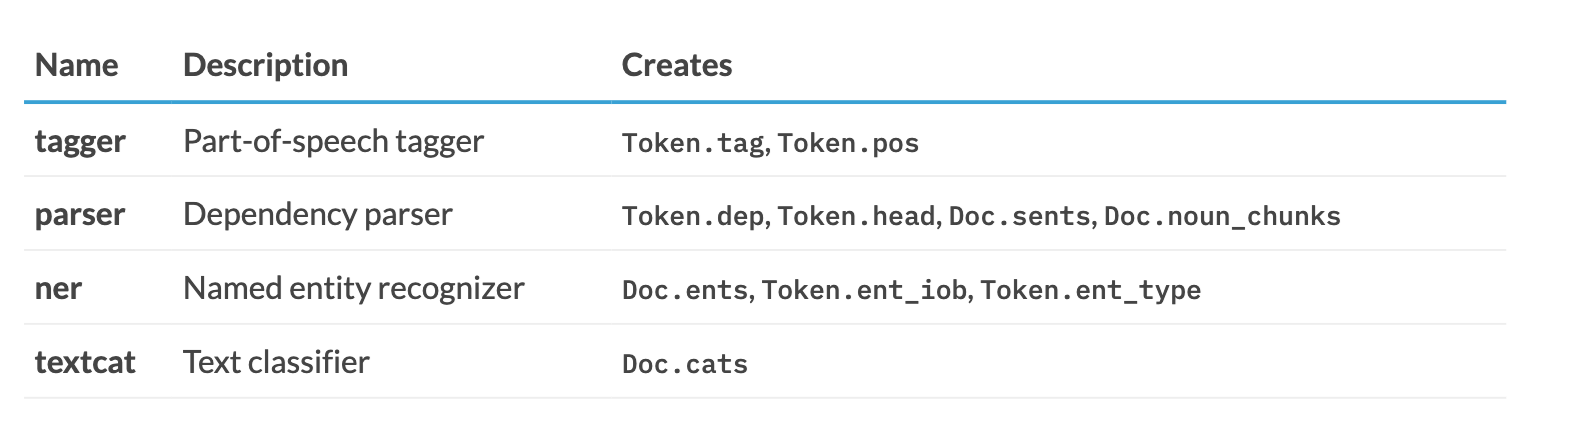

spaCy ships with a variety of built-in pipeline components. Here are some of the most common ones that you'll want to use in your projects.

The part-of-speech tagger sets the token.tag and token.pos attributes.

The dependency parser adds the token.dep and token.head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

The named entity recognizer adds the detected entities to the doc.ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc.cats property.

Because text categories are always very specific, the text classifier is not included in any of the trained pipelines by default. But you can use it to train your own system.

# 2. What happens when you call nlp?


In [3]:
doc = nlp("This is a sentence.")

Tokenize the text and apply each pipeline component in order.

# 3. Inspecting the pipeline

Let’s inspect the small English pipeline!

* Load the en_core_web_sm pipeline and create the nlp object.
* Print the names of the pipeline components using nlp.pipe_names.
* Print the full pipeline of (name, component) tuples using nlp.pipeline.

In [4]:
import spacy

# Load the en_core_web_sm pipeline
nlp = spacy.load("en_core_web_sm")

# Print the names of the pipeline components
print(nlp.pipe_names)

# Print the full pipeline of (name, component) tuples
print(nlp.pipeline)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x7864fe74ef20>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x7864fe74f760>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x7864fee43e60>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x7864fe82db80>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x7864fe52de80>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x7864fd2bc120>)]


# 4. Custom pipeline components

Now that you know how spaCy's pipeline works, let's take a look at another very powerful feature: custom pipeline components.

Custom pipeline components let you add your own function to the spaCy pipeline that is executed when you call the nlp object on a text – for example, to modify the doc and add more data to it.

## Why custom components?

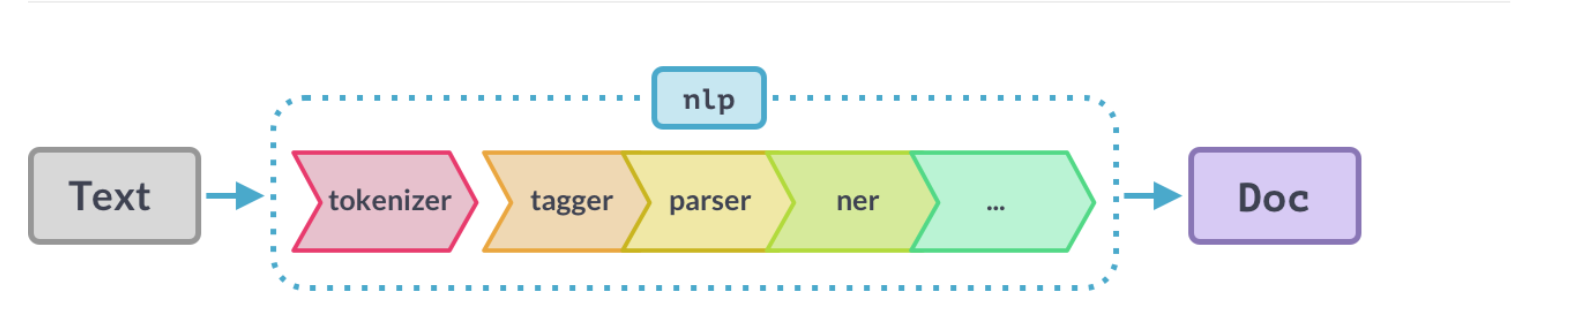

* Make a function execute automatically when you call nlp
* Add your own metadata to documents and tokens
* Updating built-in attributes like doc.ents

After the text is tokenized and a Doc object has been created, pipeline components are applied in order. spaCy supports a range of built-in components, but also lets you define your own.

Custom components are executed automatically when you call the nlp object on a text.

They're especially useful for adding your own custom metadata to documents and tokens.

You can also use them to update built-in attributes, like the named entity spans.

## Anatomy of a component (1)

* Function that takes a doc, modifies it and returns it
* Registered using the Language.component decorator
* Can be added using the nlp.add_pipe method

In [12]:
from spacy.language import Language

@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

<function __main__.custom_component_function(doc)>

Fundamentally, a pipeline component is a function or callable that takes a doc, modifies it and returns it, so it can be processed by the next component in the pipeline.

To tell spaCy where to find your custom component and how it should be called, you can decorate it using the @Language.component decorator. Just add it to the line right above the function definition.

Once a component is registered, it can be added to the pipeline using the nlp.add_pipe method. The method takes at least one argument: the string name of the component.

## Anatomy of a component (2)

In [5]:
@Language.component("custom_component")
def custom_component_function(doc):
    # Do something to the doc here
    return doc

nlp.add_pipe("custom_component")

NameError: name 'Language' is not defined

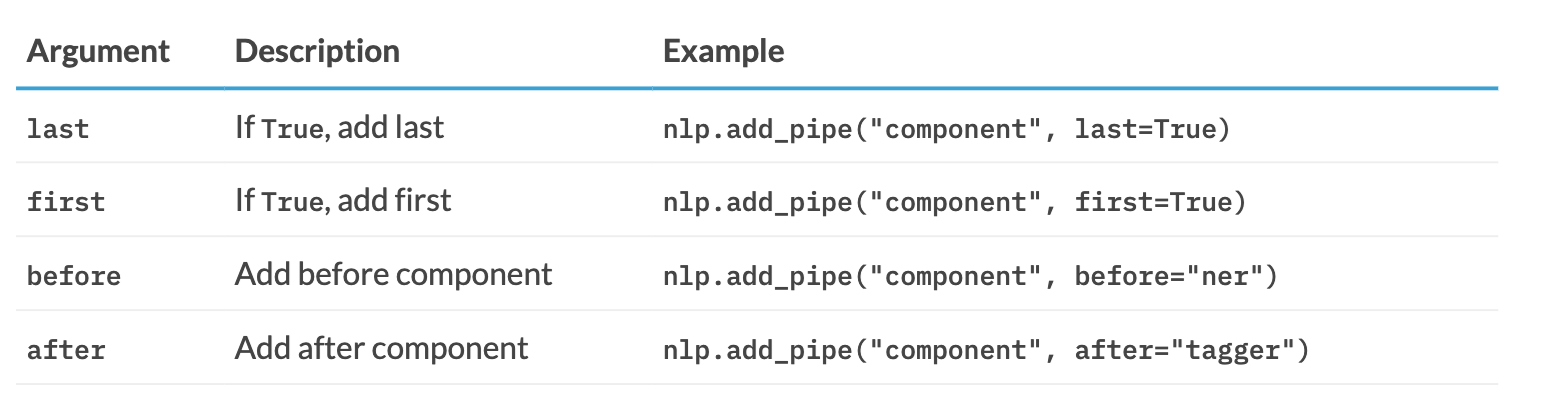

To specify where to add the component in the pipeline, you can use the following keyword arguments:

Setting last to True will add the component last in the pipeline. This is the default behavior.

Setting first to True will add the component first in the pipeline, right after the tokenizer.

The before and after arguments let you define the name of an existing component to add the new component before or after. For example, before="ner" will add it before the named entity recognizer.

The other component to add the new component before or after needs to exist, though – otherwise, spaCy will raise an error.

## Example: a simple component (1)

In [14]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Print the pipeline component names
print("Pipeline:", nlp.pipe_names)

Pipeline: ['custom_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


Here's an example of a simple pipeline component.

We start off with the small English pipeline.

We then define the component – a function that takes a Doc object and returns it.

Let's do something simple and print the length of the doc that passes through the pipeline.

Don't forget to return the doc so it can be processed by the next component in the pipeline! The doc created by the tokenizer is passed through all components, so it's important that they all return the modified doc.

To tell spaCy about the new component, we register it using the @Language.component decorator and call it "custom_component".

We can now add the component to the pipeline. Let's add it to the very beginning right after the tokenizer by setting first=True.

When we print the pipeline component names, the custom component now shows up at the start. This means it will be applied first when we process a doc.

# Example: a simple component (2)

In [15]:
# Create the nlp object
nlp = spacy.load("en_core_web_sm")

# Define a custom component
@Language.component("custom_component")
def custom_component_function(doc):
    # Print the doc's length
    print("Doc length:", len(doc))
    # Return the doc object
    return doc

# Add the component first in the pipeline
nlp.add_pipe("custom_component", first=True)

# Process a text
doc = nlp("Hello world!")

Doc length: 3


Now when we process a text using the nlp object, the custom component will be applied to the doc and the length of the document will be printed.

# Simple components

The example shows a custom component that prints the number of tokens in a document. Can you complete it?

* Complete the component function with the doc’s length.
* Add the "length_component" to the existing pipeline as the first component.
* Try out the new pipeline and process any text with the nlp object – for example “This is a sentence.”.

In [16]:
import spacy
from spacy.language import Language

# Define the custom component
@Language.component("length_component")
def length_component_function(doc):
    # Get the doc's length
    doc_length = len(doc)
    print(f"This document is {doc_length} tokens long.")
    # Return the doc
    return doc


# Load the small English pipeline
nlp = spacy.load("en_core_web_sm")

# Add the component first in the pipeline and print the pipe names
nlp.add_pipe("length_component", first=True)
print(nlp.pipe_names)

# Process a text
doc = nlp("This is a sentence.")

['length_component', 'tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
This document is 5 tokens long.


# 7. Complex components

In this exercise, you’ll be writing a custom component that uses the PhraseMatcher to find animal names in the document and adds the matched spans to the doc.ents. A PhraseMatcher with the animal patterns has already been created as the variable matcher.

* Define the custom component and apply the matcher to the doc.
* Create a Span for each match, assign the label ID for "ANIMAL" and overwrite the doc.ents with the new spans.
* Add the new component to the pipeline after the "ner" component.
* Process the text and print the entity text and entity label for the entities in doc.ents.

In [17]:
import spacy
from spacy.language import Language
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", animal_patterns)

# Define the custom component
@Language.component("animal_component")
def animal_component_function(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc


# Add the component to the pipeline after the "ner" component
nlp.add_pipe("animal_component", after="ner")
print(nlp.pipe_names)

# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


# 8. Extension attributes
In this lesson, you'll learn how to add custom attributes to the Doc, Token and Span objects to store custom data.

## Setting custom attributes
* Add custom metadata to documents, tokens and spans
* Accessible via the ._ property

In [19]:
doc._.title = "My document"
token._.is_color = True
span._.has_color = False

AttributeError: [E047] Can't assign a value to unregistered extension attribute 'title'. Did you forget to call the `set_extension` method?

* Registered on the global Doc, Token or Span using the set_extension method

In [20]:
# Import global classes
from spacy.tokens import Doc, Token, Span

# Set extensions on the Doc, Token and Span
Doc.set_extension("title", default=None)
Token.set_extension("is_color", default=False)
Span.set_extension("has_color", default=False)

Custom attributes let you add any metadata to docs, tokens and spans. The data can be added once, or it can be computed dynamically.

Custom attributes are available via the ._ (dot underscore) property. This makes it clear that they were added by the user, and not built into spaCy, like token.text.

Attributes need to be registered on the global Doc, Token and Span classes you can import from spacy.tokens. You've already worked with those in the previous chapters. To register a custom attribute on the Doc, Token and Span, you can use the set_extension method.

The first argument is the attribute name. Keyword arguments let you define how the value should be computed. In this case, it has a default value and can be overwritten.

## Extension attribute types

1. Attribute extensions
2. Property extensions
3. Method extensions

There are three types of extensions: attribute extensions, property extensions and method extensions.

## Attribute extensions
* Set a default value that can be overwritten

In [4]:
from spacy.tokens import Token

# Set extension on the Token with default value
Token.set_extension("is_color", default=False)

doc = nlp("The sky is blue.")

# Overwrite extension attribute value
doc[3]._.is_color = True

ValueError: [E090] Extension 'is_color' already exists on Token. To overwrite the existing extension, set `force=True` on `Token.set_extension`.

Attribute extensions set a default value that can be overwritten.

For example, a custom is_color attribute on the token that defaults to False.

On individual tokens, its value can be changed by overwriting it – in this case, True for the token "blue".

## Property extensions (1)

* Define a getter and an optional setter function
* Getter only called when you retrieve the attribute value

In [5]:
from spacy.tokens import Token

# Define getter function
def get_is_color(token):
    colors = ["red", "yellow", "blue"]
    return token.text in colors

# Set extension on the Token with getter
Token.set_extension("is_color", getter=get_is_color)

doc = nlp("The sky is blue.")
print(doc[3]._.is_color, "-", doc[3].text)

ValueError: [E090] Extension 'is_color' already exists on Token. To overwrite the existing extension, set `force=True` on `Token.set_extension`.

Property extensions work like properties in Python: they can define a getter function and an optional setter.

The getter function is only called when you retrieve the attribute. This lets you compute the value dynamically, and even take other custom attributes into account.

Getter functions take one argument: the object, in this case, the token. In this example, the function returns whether the token text is in our list of colors.

We can then provide the function via the getter keyword argument when we register the extension.

The token "blue" now returns True for ._.is_color.

## Property extensions (2)
* Span extensions should almost always use a getter

In [6]:
from spacy.tokens import Span

# Define getter function
def get_has_color(span):
    colors = ["red", "yellow", "blue"]
    return any(token.text in colors for token in span)

# Set extension on the Span with getter
Span.set_extension("has_color", getter=get_has_color)

doc = nlp("The sky is blue.")
print(doc[1:4]._.has_color, "-", doc[1:4].text)
print(doc[0:2]._.has_color, "-", doc[0:2].text)

True - sky is blue
False - The sky


If you want to set extension attributes on a span, you almost always want to use a property extension with a getter. Otherwise, you'd have to update every possible span ever by hand to set all the values.

In this example, the get_has_color function takes the span and returns whether the text of any of the tokens is in the list of colors.

After we've processed the doc, we can check different slices of the doc and the custom ._.has_color property returns whether the span contains a color token or not.

## Method extensions
* Assign a function that becomes available as an object method
* Lets you pass arguments to the extension function

In [7]:
from spacy.tokens import Doc

# Define method with arguments
def has_token(doc, token_text):
    in_doc = token_text in [token.text for token in doc]
    return in_doc

# Set extension on the Doc with method
Doc.set_extension("has_token", method=has_token)

doc = nlp("The sky is blue.")
print(doc._.has_token("blue"), "- blue")
print(doc._.has_token("cloud"), "- cloud")

True - blue
False - cloud


Method extensions make the extension attribute a callable method.

You can then pass one or more arguments to it, and compute attribute values dynamically – for example, based on a certain argument or setting.

In this example, the method function checks whether the doc contains a token with a given text. The first argument of the method is always the object itself – in this case, the doc. It's passed in automatically when the method is called. All other function arguments will be arguments on the method extension. In this case, token_text.

Here, the custom ._.has_token method returns True for the word "blue" and False for the word "cloud".

# 9. Setting extension attributes (1)

Let’s practice setting some extension attributes.

**Step 1**

* Use Token.set_extension to register "is_country" (default False).
* Update it for "Spain" and print it for all tokens.

In [8]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Register the Token extension attribute "is_country" with the default value False
Token.set_extension("is_country", default=False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)]


**Step 2**
* Use Token.set_extension to register "reversed" (getter function get_reversed).
* Print its value for each token.

In [9]:
import spacy
from spacy.tokens import Token

nlp = spacy.blank("en")

# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]


# Register the Token property extension "reversed" with the getter get_reversed
Token.set_extension("reversed", getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print("reversed:", token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


# 10. Setting extension attributes (2)

Let’s try setting some more complex attributes using getters and method extensions.

**Part 1**
* Complete the get_has_number function .
* Use Doc.set_extension to register "has_number" (getter get_has_number) and print its value.

In [11]:
import spacy
from spacy.tokens import Doc

nlp = spacy.blank("en")

# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)


# Register the Doc property extension "has_number" with the getter get_has_number
Doc.set_extension("has_number", getter=get_has_number)

# Process the text and check the custom has_number attribute
doc = nlp("The museum closed for five years in 2012.")
print("has_number:", doc._.has_number)

has_number: True


**Part 2**
* Use Span.set_extension to register "to_html" (method to_html).
* Call it on doc[0:2] with the tag "strong".

In [12]:
import spacy
from spacy.tokens import Span

nlp = spacy.blank("en")

# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return f"<{tag}>{span.text}</{tag}>"


# Register the Span method extension "to_html" with the method to_html
Span.set_extension("to_html", method=to_html)

# Process the text and call the to_html method on the span with the tag name "strong"
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html("strong"))

<strong>Hello world</strong>


# 11. Entities and extensions

In [1]:
import spacy
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")


def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ("PERSON", "ORG", "GPE", "LOCATION"):
        entity_text = span.text.replace(" ", "_")
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text


# Set the Span extension wikipedia_url using the getter get_wikipedia_url
Span.set_extension("wikipedia_url", getter=get_wikipedia_url)

doc = nlp(
    "In over fifty years from his very first recordings right through to his "
    "last album, David Bowie was at the vanguard of contemporary culture."
)
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

fifty years None
first None
David Bowie https://en.wikipedia.org/w/index.php?search=David_Bowie


# 12. Components with extensions

Extension attributes are especially powerful if they’re combined with custom pipeline components. In this exercise, you’ll write a pipeline component that finds country names and a custom extension attribute that returns a country’s capital, if available.

A phrase matcher with all countries is available as the variable matcher. A dictionary of countries mapped to their capital cities is available as the variable CAPITALS.

Complete the countries_component_function and create a Span with the label "GPE" (geopolitical entity) for all matches.
Add the component to the pipeline.
Register the Span extension attribute "capital" with the getter get_capital.
Process the text and print the entity text, entity label and entity capital for each entity span in doc.ents.

In [3]:
import json
import spacy
from spacy.language import Language
from spacy.tokens import Span
from spacy.matcher import PhraseMatcher

with open("exercises/en/countries.json", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

with open("exercises/en/capitals.json", encoding="utf8") as f:
    CAPITALS = json.loads(f.read())

nlp = spacy.blank("en")
matcher = PhraseMatcher(nlp.vocab)
matcher.add("COUNTRY", list(nlp.pipe(COUNTRIES)))


@Language.component("countries_component")
def countries_component_function(doc):
    # Create an entity Span with the label "GPE" for all matches
    matches = matcher(doc)
    doc.ents = [Span(doc, start, end, label="GPE") for match_id, start, end in matches]
    return doc


# Add the component to the pipeline
nlp.add_pipe("countries_component")
print(nlp.pipe_names)

# Getter that looks up the span text in the dictionary of country capitals
get_capital = lambda span: CAPITALS.get(span.text)

# Register the Span extension attribute "capital" with the getter get_capital
Span.set_extension("capital", getter=get_capital)

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

FileNotFoundError: [Errno 2] No such file or directory: 'exercises/en/countries.json'

# 13. Scaling and performance
## Processing large volumes of text
* Use nlp.pipe method
* Processes texts as a stream, yields Doc objects
* Much faster than calling nlp on each text

In [4]:
# BAD:
docs = [nlp(text) for text in LOTS_OF_TEXTS]

NameError: name 'LOTS_OF_TEXTS' is not defined

In [ ]:
# GOOD:
docs = list(nlp.pipe(LOTS_OF_TEXTS))

If you need to process a lot of texts and create a lot of Doc objects in a row, the nlp.pipe method can speed this up significantly.

It processes the texts as a stream and yields Doc objects.

It is much faster than just calling nlp on each text, because it batches up the texts.

nlp.pipe is a generator that yields Doc objects, so in order to get a list of docs, remember to call the list method around it.

## Passing in context (1)
* Setting as_tuples=True on nlp.pipe lets you pass in (text, context) tuples
* Yields (doc, context) tuples
* Useful for associating metadata with the doc

In [7]:
data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    print(doc.text, context["page_number"])

This is a text 15
And another text 16


nlp.pipe also supports passing in tuples of text / context if you set as_tuples to True.

The method will then yield doc / context tuples.

This is useful for passing in additional metadata, like an ID associated with the text, or a page number.

## Passing in context (2)

In [9]:
from spacy.tokens import Doc

Doc.set_extension("id", default=None)
Doc.set_extension("page_number", default=None)

data = [
    ("This is a text", {"id": 1, "page_number": 15}),
    ("And another text", {"id": 2, "page_number": 16}),
]

for doc, context in nlp.pipe(data, as_tuples=True):
    doc._.id = context["id"]
    doc._.page_number = context["page_number"]

You can even add the context metadata to custom attributes.

In this example, we're registering two extensions, id and page_number, which default to None.

After processing the text and passing through the context, we can overwrite the doc extensions with our context metadata.

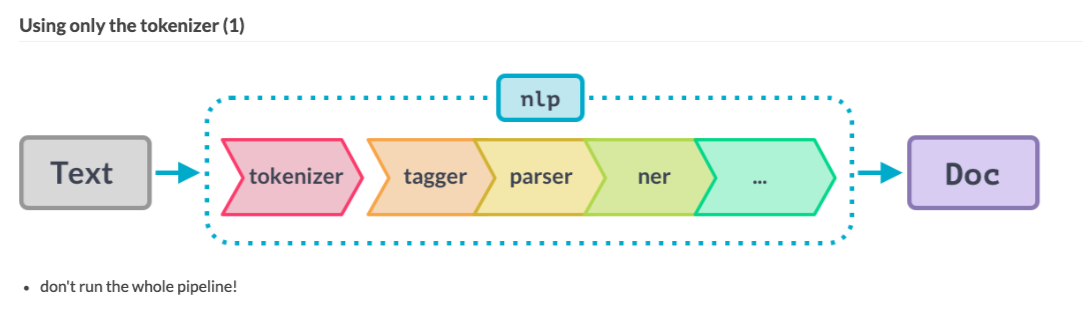

Another common scenario: Sometimes you already have a model loaded to do other processing, but you only need the tokenizer for one particular text.

Running the whole pipeline is unnecessarily slow, because you'll be getting a bunch of predictions from the model that you don't need.

## Using only the tokenizer (2)
Use nlp.make_doc to turn a text into a Doc object

In [ ]:
# BAD:
doc = nlp("Hello world")

In [ ]:
# GOOD
doc = nlp.make_doc("Hello world!")

If you only need a tokenized Doc object, you can use the nlp.make_doc method instead, which takes a text and returns a doc.

This is also how spaCy does it behind the scenes: nlp.make_doc turns the text into a doc before the pipeline components are called.

## Disabling pipeline components

Use nlp.select_pipes to temporarily disable one or more pipes

In [10]:
# Disable tagger and parser
with nlp.select_pipes(disable=["tagger", "parser"]):
    # Process the text and print the entities
    doc = nlp(text)
    print(doc.ents)

NameError: name 'text' is not defined

* Restores them after the with block
* Only runs the remaining components

spaCy also allows you to temporarily disable pipeline components using the nlp.select_pipes context manager.

It accepts the keyword arguments enable or disable that can define a list of string names of the pipeline components to disable. For example, if you only want to use the entity recognizer to process a document, you can temporarily disable the tagger and parser.

After the with block, the disabled pipeline components are automatically restored.

In the with block, spaCy will only run the remaining components.

# 14. Processing stream

In this exercise, you’ll be using nlp.pipe for more efficient text processing. The nlp object has already been created for you. A list of tweets about a popular American fast food chain are available as the variable TEXTS.

**Part 1**
* Rewrite the example to use nlp.pipe. Instead of iterating over the texts and processing them, iterate over the doc objects yielded by nlp.pipe.

In [11]:
import json
import spacy
​
nlp = spacy.load("en_core_web_sm")
​
with open("exercises/en/tweets.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())
​
# Process the texts and print the adjectives
for text in TEXTS:
    doc = nlp(text)
    print([token.text for token in doc if token.pos_ == "ADJ"])

SyntaxError: invalid non-printable character U+200B (3471816094.py, line 3)

**Part 2** 
* Rewrite the example to use nlp.pipe. Don’t forget to call list() around the result to turn it into a list.

In [12]:
import json
import spacy

nlp = spacy.load("en_core_web_sm")

with open("exercises/en/tweets.json", encoding="utf8") as f:
    TEXTS = json.loads(f.read())

# Process the texts and print the entities
docs = [nlp(text) for text in TEXTS]
entities = [doc.ents for doc in docs]
print(*entities)

FileNotFoundError: [Errno 2] No such file or directory: 'exercises/en/tweets.json'

**Part 3**
* Rewrite the example to use nlp.pipe. Don’t forget to call list() around the result to turn it into a list.


In [13]:
import spacy

nlp = spacy.blank("en")

people = ["David Bowie", "Angela Merkel", "Lady Gaga"]

# Create a list of patterns for the PhraseMatcher
patterns = [nlp(person) for person in people]

# 15. Processing data with context

In this exercise, you’ll be using custom attributes to add author and book meta information to quotes.

A list of [text, context] examples is available as the variable DATA. The texts are quotes from famous books, and the contexts dictionaries with the keys "author" and "book".

* Use the set_extension method to register the custom attributes "author" and "book" on the Doc, which default to None.
* Process the [text, context] pairs in DATA using nlp.pipe with as_tuples=True.
* Overwrite the doc._.book and doc._.author with the respective info passed in as the context.

In [14]:
import json
import spacy
from spacy.tokens import Doc

with open("exercises/en/bookquotes.json", encoding="utf8") as f:
    DATA = json.loads(f.read())

nlp = spacy.blank("en")

# Register the Doc extension "author" (default None)
Doc.set_extension("author", default=None)

# Register the Doc extension "book" (default None)
Doc.set_extension("book", default=None)

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context["book"]
    doc._.author = context["author"]

    # Print the text and custom attribute data
    print(f"{doc.text}\n — '{doc._.book}' by {doc._.author}\n")

FileNotFoundError: [Errno 2] No such file or directory: 'exercises/en/bookquotes.json'

# 16. Selective processing
In this exercise, you’ll use the nlp.make_doc and nlp.select_pipes methods to only run selected components when processing a text.

**Part 1**
* Rewrite the code to only tokenize the text using nlp.make_doc.


In [16]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Only tokenize the text
doc = nlp.make_doc(text)

**Part 2**
* Disable the tagger and lemmatizer using the nlp.select_pipes method.
* Process the text and print all entities in the doc.

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = (
    "Chick-fil-A is an American fast food restaurant chain headquartered in "
    "the city of College Park, Georgia, specializing in chicken sandwiches."
)

# Disable the tagger and lemmatizer
with nlp.select_pipes(disable=["tagger", "lemmatizer"]):
    # Process the text
    doc = nlp(text)
    # Print the entities in the doc
    print(doc.ents)

(Chick, American, College Park, Georgia)
